In [3]:
### Setup & Load
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.stattools import ccf

# Load the clean data
df = pd.read_csv('../data/processed/clean_wastewater_data.csv', parse_dates=['Date'])
df.set_index('Date', inplace=True)
df.sort_index(inplace=True)

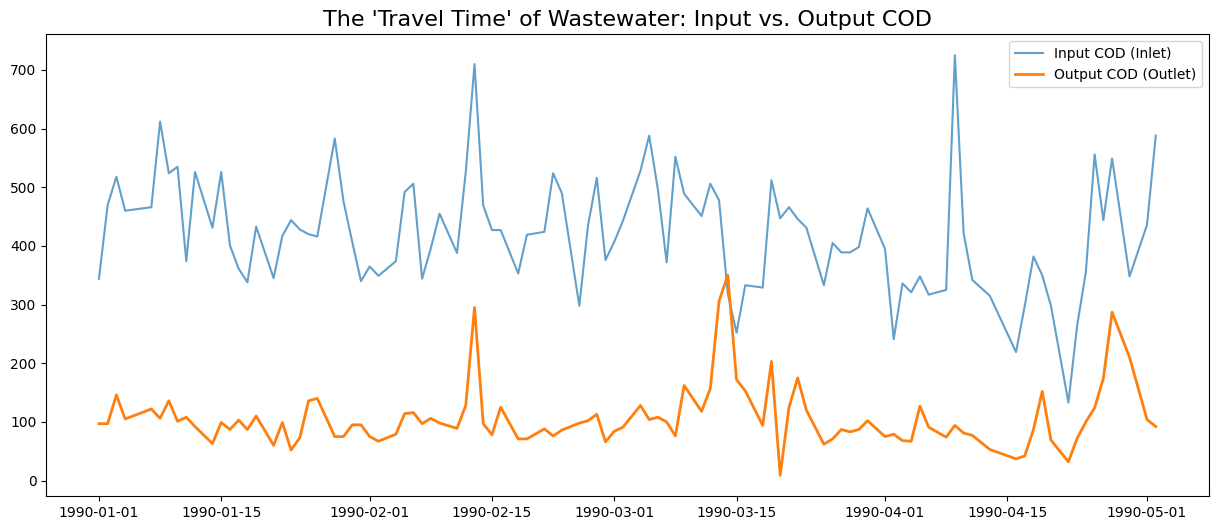

In [4]:
#### Visualizing the "Travel" of a Pollutant
# compare the input COD and output COD 
plt.figure(figsize=(15, 6))
plt.plot(df.index[:100], df['DQO_E_Input_COD'][:100], label='Input COD (Inlet)', alpha=0.7)
plt.plot(df.index[:100], df['DQO_S_Output_COD'][:100], label='Output COD (Outlet)', linewidth=2)
plt.title("The 'Travel Time' of Wastewater: Input vs. Output COD", fontsize=16)
plt.legend()
plt.show()

In [ ]:
### Input vs. Output COD
# Pollutant Attenuation (The Gap):
# The input COD (Blue) fluctuates wildly between 300 and 700 mg/L
# The output COD (organge) is significantly lower and smoother, staying mostly
# below 200 mg/L

### Peak Mirroring (Lag)
# high pollution shock at the inlet doesn't hit the outlet instantly. 

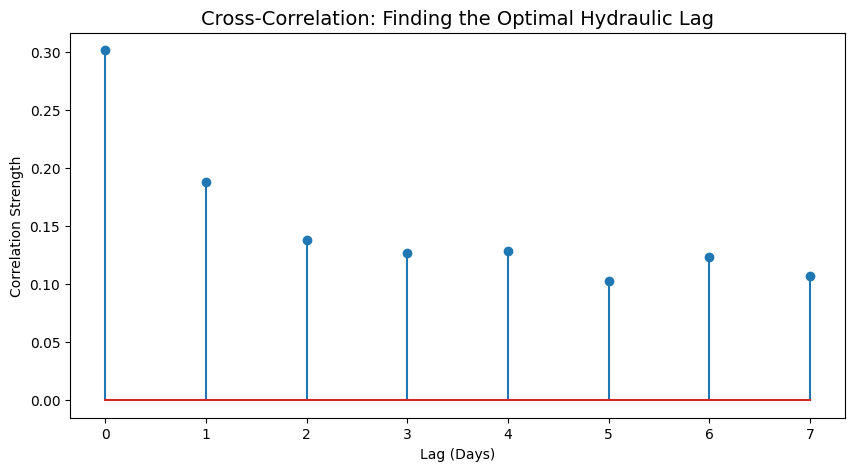

Optimal Lag: 0 days


In [5]:
#### Cross-correlation Function (CCF)
# mathematically finding the lag. what is the lag number that gives the 
# the highest correlation
# We calculate the correlation at different time shifts (lags)
# Note: Since the UCI data is daily, 'lag 1' = 1 day.
lags = 7 # Looking back 1 week
correlations = []

for i in range(lags + 1):
    # Shift the output back to see if it aligns better with past input
    corr = df['DQO_E_Input_COD'].corr(df['DQO_S_Output_COD'].shift(-i))
    correlations.append(corr)

plt.figure(figsize=(10, 5))
plt.stem(range(lags + 1), correlations)
plt.title("Cross-Correlation: Finding the Optimal Hydraulic Lag", fontsize=14)
plt.xlabel("Lag (Days)")
plt.ylabel("Correlation Strength")
plt.show()

print(f"Optimal Lag: {np.argmax(correlations)} days")


In [ ]:
# Hydraulic Retention Time
# from the plant's retention time is less than 24 hours. water that enters in 
# in the morning leaves the treatment site in the evening.
